<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/fdm_de1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solving a second order linear equation by FDM**

* We show how to find a numerical solution to
  the ordinary differential equation  
  $\qquad
  \left\{
  \begin{array}{l}
  y'' + y = 0, \quad 0\leq x\leq\pi
  \\
  y(0) = 1
  \\
  y'(0) = 0
  \end{array}
  \right.
  \newcommand{\Dx}{\Delta x}
  \newcommand{\Dy}{\Delta y}
  \newcommand{\Dz}{\Delta z}
  \newcommand{\Dt}{\Delta t}
  \newcommand{\Ds}{\Delta s}
  \newcommand{\Du}{\Delta u}
  \newcommand{\U}{\mathbf{U}}
  \renewcommand{\V}{\mathbf{V}}
  $  

* Our interval $[0,\pi]$ is divided to $n$ equal subintervals
  $x_i = \pi/n$.

* We use the backward difference second derivative formula
  $y''=\frac{y_{i} - 2y_{i-1} + y_{i-2}}{\Dx^2}$.

* Hence  
  $\qquad\displaystyle
  \frac{y_{i} - 2y_{i-1} + y_{i-2}}{\Dx^2} + y_i = 0
  $

* From which we immediately get a recursive solution  
  $\qquad\displaystyle
  y_{i} = \frac{2y_{i-1} - y_{i-2}}{1+d^2}
  $

In [1]:
%pip install -q https://samyzaf.com/fdmtools-4.zip
from fdmtools import *

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


* First we define our grid parameters.
* For a start we use a small division size $N=100$.

In [6]:
a = 0                   # Interval = [0,2]
b = pi
N = 200                 # Division size 100
dx = (b-a)/N            # x step
X = np.array([a + i*dx for i in range(N+1)])  # x nodes
Y = np.zeros(N+1)       # y nodes (initialized to zero)

* The second initial condition is equivalent to
  $y'(0) = \frac{y_1 - y_0}{\Dx} = 0$
* Hence $y_1 = y_0 = 1$

In [7]:
Y[0] = 1                              # initial condition y(0) = 1
Y[1] = 1                              # initial condition y'(0) = 1
for i in range(2, N+1):
    Y[i] = (2*Y[i-1] - Y[i-2]) / (1 + dx**2)

* We now plot the graph of the array **Y**

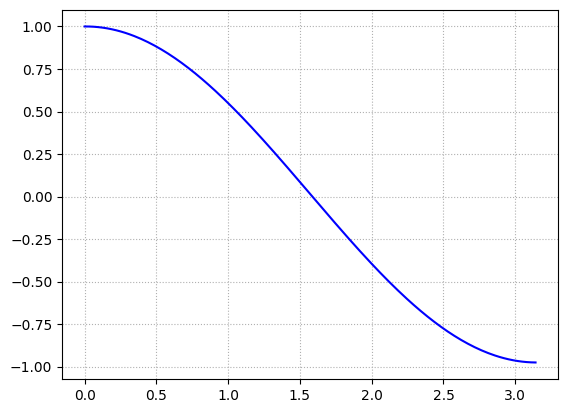

In [8]:
plt.plot(X, Y, color="blue", linewidth=1.5)

* The real solution to this problem is $y(x) = \cos x$.
* Lets draw it using matplotlib.

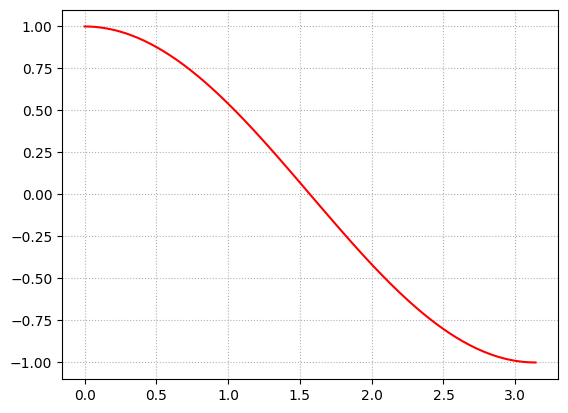

In [9]:
Yreal = np.cos(X)    # The real solution of the equation
plt.plot(X, Yreal, color="red", linewidth=1.5)

* The graphs look very similar.
* At the right end ($x=\pi$) we
  can notice a small deviation!

* To get a better comparison between the graphs,
  we should draw them together on the same axis.

* We will use a blue line for the numerical solution, and dashed red
  line for the real solution.

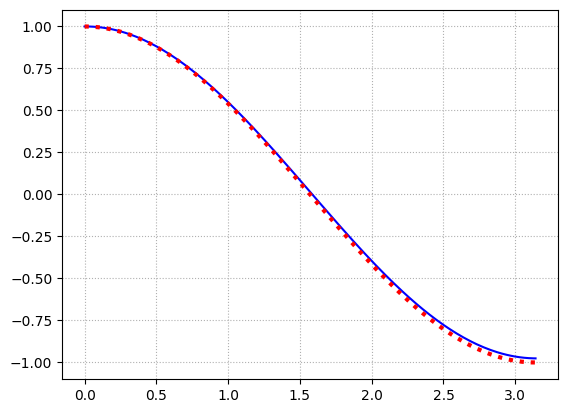

In [11]:
plt.plot(X, Y, color="blue", linewidth=1.5)
plt.plot(X, Yreal, color="red", linewidth=3.0, linestyle=':');

* The graphs look almost identical, but we notice a small gap around
  $x=2.0$ to $x=\pi$.
* We can perform a more precise numerical check:

Max err = 0.025718781687262826


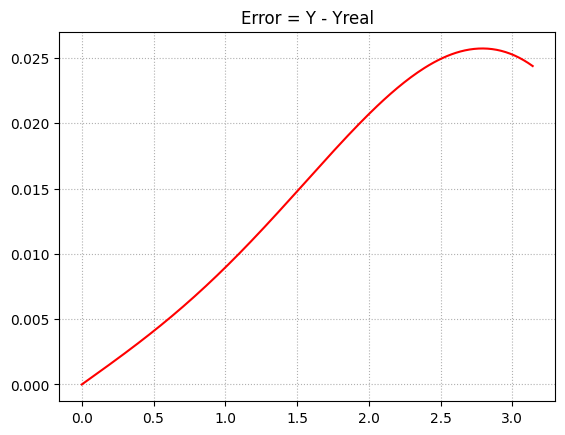

In [12]:
Yreal = np.cos(X)            # The real solution
E = np.abs(Y - Yreal)        # The real error (absolute value)
print(f"Max err = {E.max()}")

plt.title("Error = Y - Yreal")
plt.plot(X, E, color="red", linewidth=1.5);

* The maximal error is very small. Roughly $0.0257$.


* We can try a larger division like $N=1000$?

Max err = 0.005185884599138713


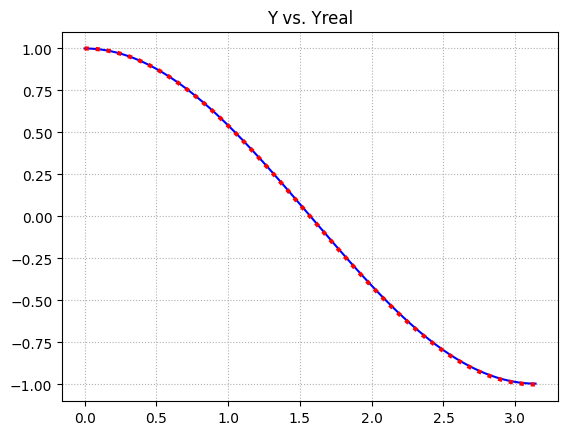

In [13]:
N = 1000
dx = (b-a)/N
Y = np.zeros(N+1)           # Array for the FDM solution
Y[0] = 1                    # initial condition y(0) = 0
Y[1] = 1
X = np.array([a + i*dx for i in range(N+1)])
for i in range(2, N+1):
    Y[i] = (2*Y[i-1] - Y[i-2]) / (1 + dx**2)

Yreal = np.cos(X)           # The real solution
E = np.abs(Y - Yreal)       # The real (absolute) error
print(f"Max err = {E.max()}")

plt.title("Y vs. Yreal")
plt.plot(X, Y, color="blue", linewidth=1.5)
plt.plot(X, Yreal, color="red", linewidth=3.0, linestyle=':')

* This time it looks as if the numerical solution **Y** overlaps
  smoothly with the real solution **Yreal**.

* The maximal error is around $0.00518$.

* This time the relative error is much smaller 1.4%.
* So changing $N=1000$ to $N=5000$ seems to get us better precision
  near the problematic endpoint $x=2.0$.

* In any case, this process shows that the Euler forward method seems
  to provide a converging solution to our problem.